In [95]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [96]:
import pandas as pd

In [97]:
data = pd.read_csv('../dataset/train.csv')

In [98]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [99]:
data.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [100]:
data.shape

(1460, 81)

In [101]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [103]:
data.isna().sum()/len(data)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [104]:
print(data.isna().sum()/len(data)*100)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


In [105]:
tmp_na = data.isna().sum()/len(data)*100

In [106]:
drop_columns = tmp_na[tmp_na>50].index.tolist()

In [107]:
drop_columns

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

In [108]:
data.drop(columns=drop_columns, inplace=True)

In [109]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [110]:
datana=data.isna().sum()
datana

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

In [111]:
datana=datana[datana>0]
len(datana[datana>0].index.tolist())

14

In [112]:
na_cols = data.isna().any()[data.isna().any()==True].index.tolist()

In [113]:
na_cols

['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [114]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenP

In [115]:
data[na_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrArea    1452 non-null   float64
 2   BsmtQual      1423 non-null   object 
 3   BsmtCond      1423 non-null   object 
 4   BsmtExposure  1422 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   Electrical    1459 non-null   object 
 8   FireplaceQu   770 non-null    object 
 9   GarageType    1379 non-null   object 
 10  GarageYrBlt   1379 non-null   float64
 11  GarageFinish  1379 non-null   object 
 12  GarageQual    1379 non-null   object 
 13  GarageCond    1379 non-null   object 
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


In [116]:
data["LotFrontage"].median()

69.0

In [117]:
data["LotFrontage"].fillna(data["LotFrontage"].median(), inplace=True)

In [118]:
data["LotFrontage"].isna().sum()

0

In [119]:
data["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

<Axes: >

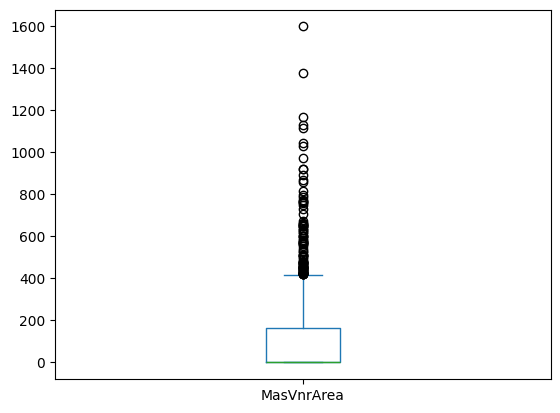

In [120]:
data["MasVnrArea"].plot.box()

In [121]:
data["MasVnrArea"].fillna(0, inplace=True)

In [122]:
data["MasVnrArea"].isna().sum()

0

In [123]:
data["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [124]:
data["BsmtQual"].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [125]:
data["BsmtQual"].mode()

0    TA
Name: BsmtQual, dtype: object

In [126]:
data["BsmtQual"].fillna(method='ffill', inplace=True)

C:\Users\Ni2\AppData\Local\Temp\ipykernel_15612\2638053097.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["BsmtQual"].fillna(method='ffill', inplace=True)


In [127]:
data["BsmtQual"].ffill(inplace=True)

In [128]:
data["BsmtQual"].isna().sum()

0

In [129]:
quartiles = pd.qcut(data["YearBuilt"], q=4, labels = ["Po", "Fa", "TA", "Gd"])
quartiles

0       Gd
1       TA
2       Gd
3       Po
4       TA
        ..
1455    TA
1456    TA
1457    Po
1458    Po
1459    Fa
Name: YearBuilt, Length: 1460, dtype: category
Categories (4, object): ['Po' < 'Fa' < 'TA' < 'Gd']

In [130]:
data["BsmtCond"].fillna(quartiles, inplace = True)

In [131]:
data["BsmtCond"].isna().sum()

0

In [132]:
data.BsmtCond.unique()

array(['TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [133]:
data.BsmtCond.value_counts()

BsmtCond
TA    1317
Gd      66
Fa      57
Po      20
Name: count, dtype: int64

In [134]:
data.isna().sum()[data.isna().sum()>0]

BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [135]:
data.drop("FireplaceQu", axis=1, inplace=True)

In [136]:
data.Electrical.mode()

0    SBrkr
Name: Electrical, dtype: object

In [137]:
data['Electrical'].fillna(data.Electrical.mode()[0], inplace=True)

In [138]:
data.Electrical.value_counts()

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [139]:
data.dropna(axis=0, inplace=True)

In [140]:
data.shape

(1347, 75)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1347 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1347 non-null   int64  
 1   MSSubClass     1347 non-null   int64  
 2   MSZoning       1347 non-null   object 
 3   LotFrontage    1347 non-null   float64
 4   LotArea        1347 non-null   int64  
 5   Street         1347 non-null   object 
 6   LotShape       1347 non-null   object 
 7   LandContour    1347 non-null   object 
 8   Utilities      1347 non-null   object 
 9   LotConfig      1347 non-null   object 
 10  LandSlope      1347 non-null   object 
 11  Neighborhood   1347 non-null   object 
 12  Condition1     1347 non-null   object 
 13  Condition2     1347 non-null   object 
 14  BldgType       1347 non-null   object 
 15  HouseStyle     1347 non-null   object 
 16  OverallQual    1347 non-null   int64  
 17  OverallCond    1347 non-null   int64  
 18  YearBuilt    

In [142]:
cat_columns = [col for col in data.columns if data[col].dtype == 'object']

In [143]:
cat_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [144]:
import matplotlib.pyplot as plt

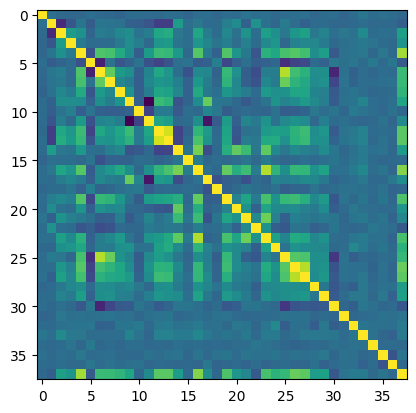

In [145]:
corr_mat = data.corr(numeric_only=True)
plt.figure()
plt.imshow(corr_mat)
plt.show()

In [146]:
from sklearn.preprocessing import LabelEncoder

In [147]:
for col in cat_columns:
    le = LabelEncoder()
    data[col+'_le'] = le.fit_transform(data[col])

In [148]:
numeric_cols = [col for col in data.columns if data[col].dtype != 'object']

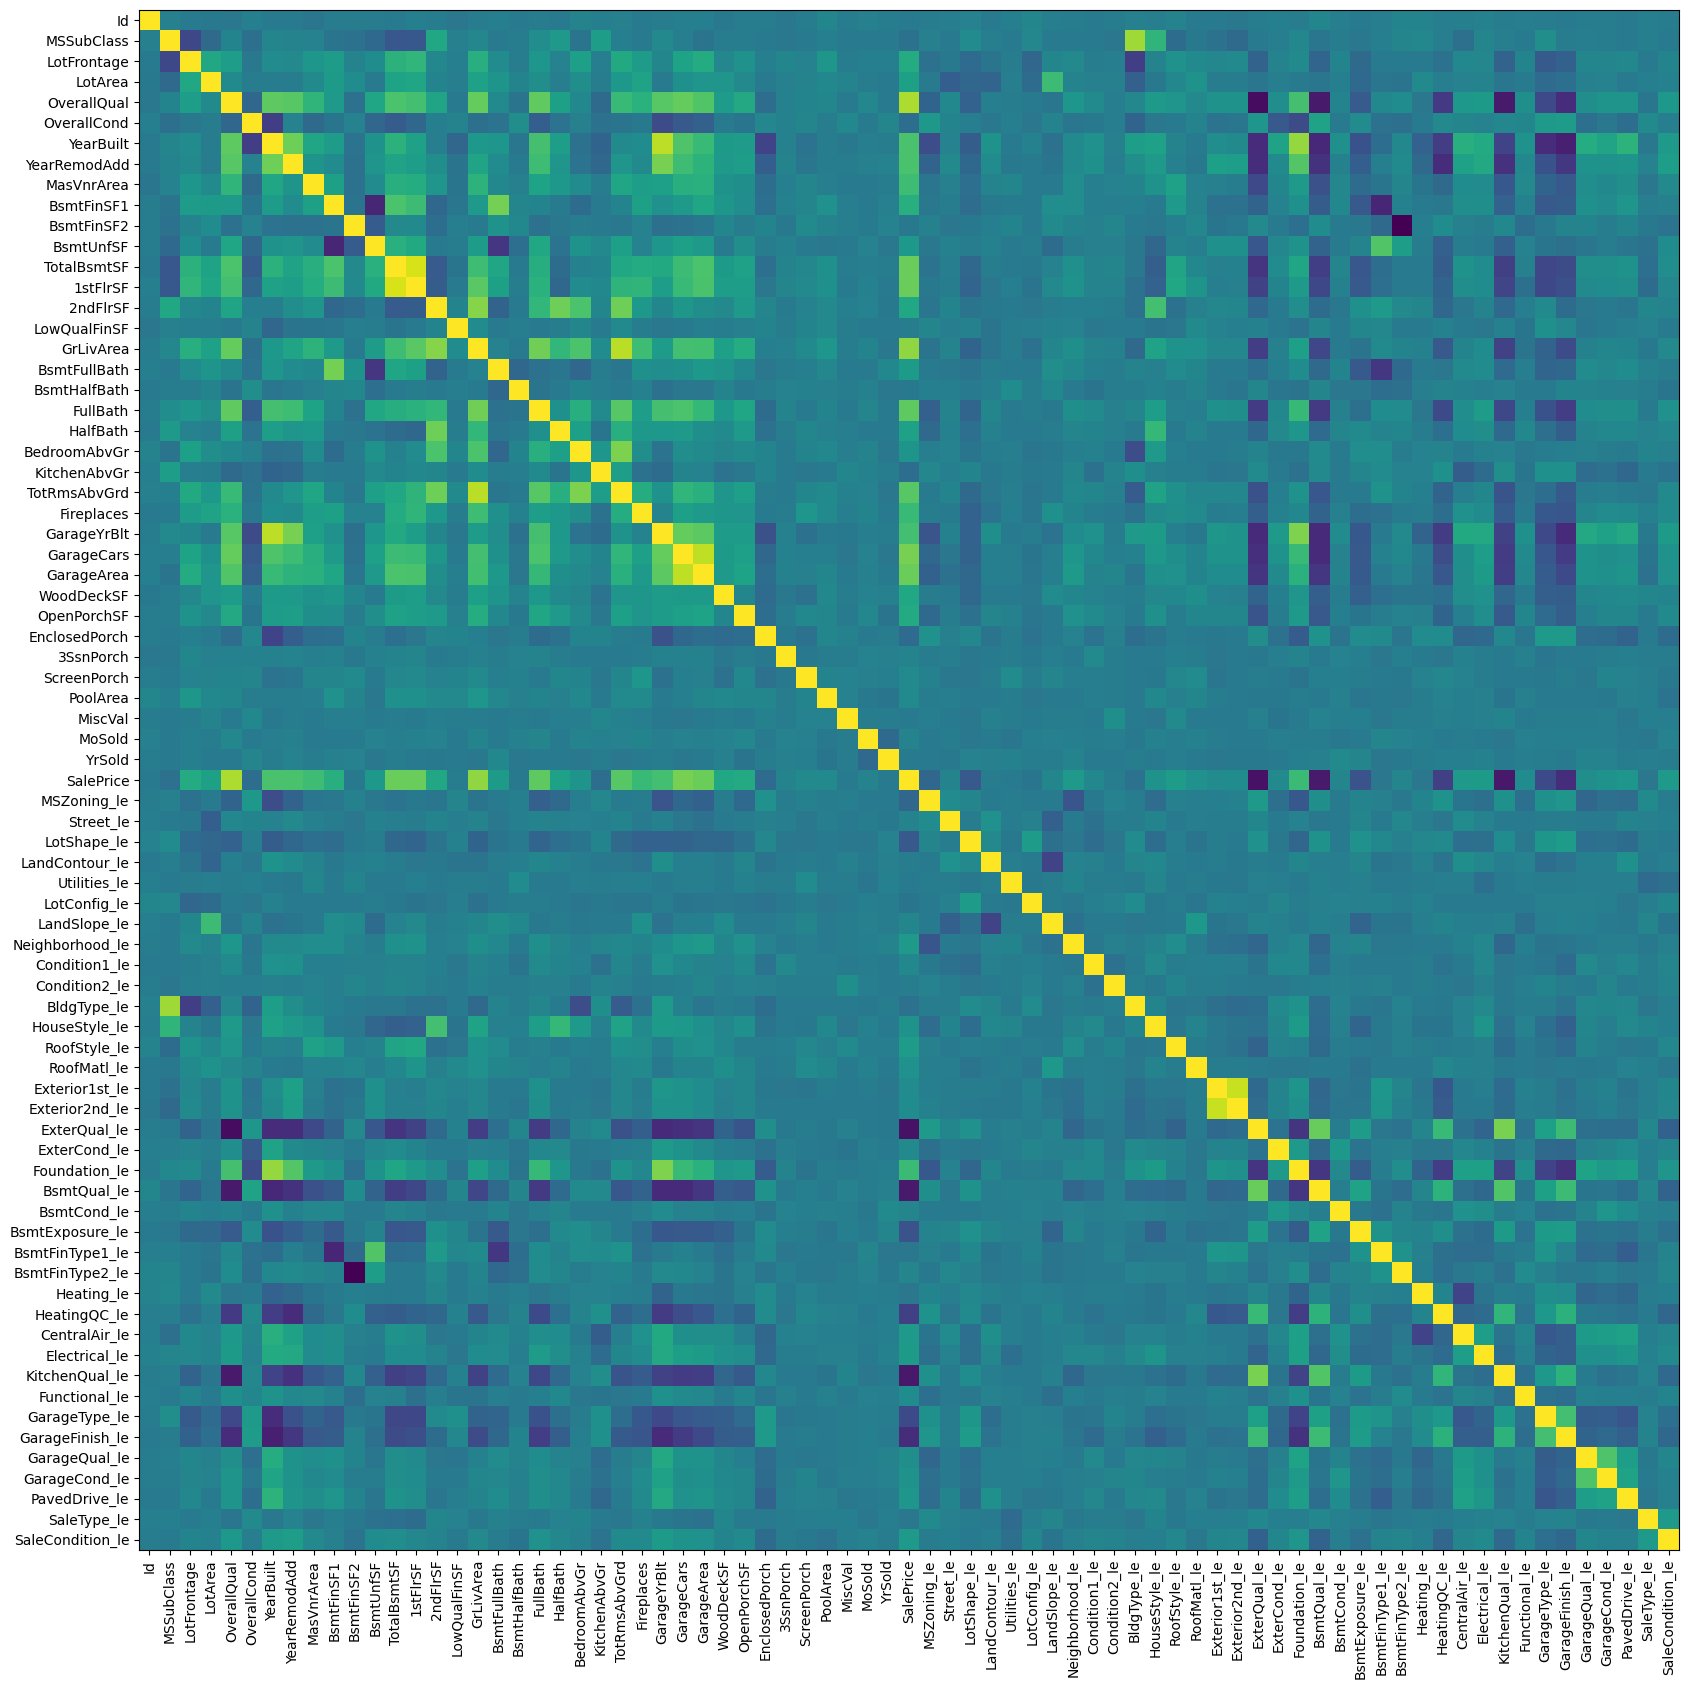

In [149]:
corr_mat = data.corr(numeric_only=True)
plt.figure(figsize=(20,20))
plt.imshow(corr_mat)
plt.xticks(ticks=range(len(numeric_cols)), labels=numeric_cols, rotation=90)
plt.yticks(ticks=range(len(numeric_cols)), labels=numeric_cols)
plt.show()

In [150]:
corr_scores = corr_mat["SalePrice"]

In [151]:
corr_variables = corr_scores[(corr_scores>=0.5) | (corr_scores<=-0.5)]

In [152]:
corr_variables

OverallQual        0.784499
YearBuilt          0.503686
YearRemodAdd       0.500745
TotalBsmtSF        0.602232
1stFlrSF           0.603425
GrLivArea          0.710031
FullBath           0.566750
TotRmsAbvGrd       0.548819
GarageCars         0.641048
GarageArea         0.608755
SalePrice          1.000000
ExterQual_le      -0.651067
BsmtQual_le       -0.613867
KitchenQual_le    -0.619196
GarageFinish_le   -0.507940
Name: SalePrice, dtype: float64

In [153]:
oh_columns = [ele.replace("_le", "") for ele in corr_variables.index if ele.endswith("_le")]

In [154]:
data[oh_columns[0]]

0       Gd
1       TA
2       Gd
3       TA
4       Gd
        ..
1455    TA
1456    TA
1457    Ex
1458    TA
1459    Gd
Name: ExterQual, Length: 1347, dtype: object

In [155]:
for col in oh_columns:
    data = pd.concat([
        data,
        pd.get_dummies(data[col], dtype='int', prefix=col+'_')
    ], axis=1)


In [156]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,BsmtQual__Fa,BsmtQual__Gd,BsmtQual__TA,KitchenQual__Ex,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__TA,GarageFinish__Fin,GarageFinish__RFn,GarageFinish__Unf
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,1,0,0,0,1,0,0,1,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,1,0,0,0,0,1,0,1,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,1,0,0,0,1,0,0,1,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,1,0,0,1,0,0,0,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,1,0,0,0,0,1,0,1,0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,1,0,0,0,0,1,0,0,1
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,0,0,1,0,0,1,0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,0,0,1,0,0,0,1


In [157]:
quant_vals = corr_variables.index[:10].tolist()

In [158]:
cat_vals = [[ele for ele in data.columns if ele.startswith(col+'__')] for col in oh_columns]

In [159]:
cat_vals

[['ExterQual__Ex', 'ExterQual__Fa', 'ExterQual__Gd', 'ExterQual__TA'],
 ['BsmtQual__Ex', 'BsmtQual__Fa', 'BsmtQual__Gd', 'BsmtQual__TA'],
 ['KitchenQual__Ex', 'KitchenQual__Fa', 'KitchenQual__Gd', 'KitchenQual__TA'],
 ['GarageFinish__Fin', 'GarageFinish__RFn', 'GarageFinish__Unf']]

In [160]:
cat_vals = np.concatenate([ele for ele in cat_vals]).tolist()

In [161]:
input_cols = quant_vals + cat_vals

In [162]:
input_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'ExterQual__Ex',
 'ExterQual__Fa',
 'ExterQual__Gd',
 'ExterQual__TA',
 'BsmtQual__Ex',
 'BsmtQual__Fa',
 'BsmtQual__Gd',
 'BsmtQual__TA',
 'KitchenQual__Ex',
 'KitchenQual__Fa',
 'KitchenQual__Gd',
 'KitchenQual__TA',
 'GarageFinish__Fin',
 'GarageFinish__RFn',
 'GarageFinish__Unf']

In [163]:
X = data[input_cols].values
y = data['SalePrice'].values

In [164]:
X.shape, y.shape

((1347, 25), (1347,))

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [167]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((942, 25), (405, 25), (942,), (405,))

In [168]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [169]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [170]:
models = {
    "reg_lin": linear_model.LinearRegression(),
    "rand_for": RandomForestRegressor(),
    "SVR":SVR()
}

##################################################
Modèle en cours:  reg_lin


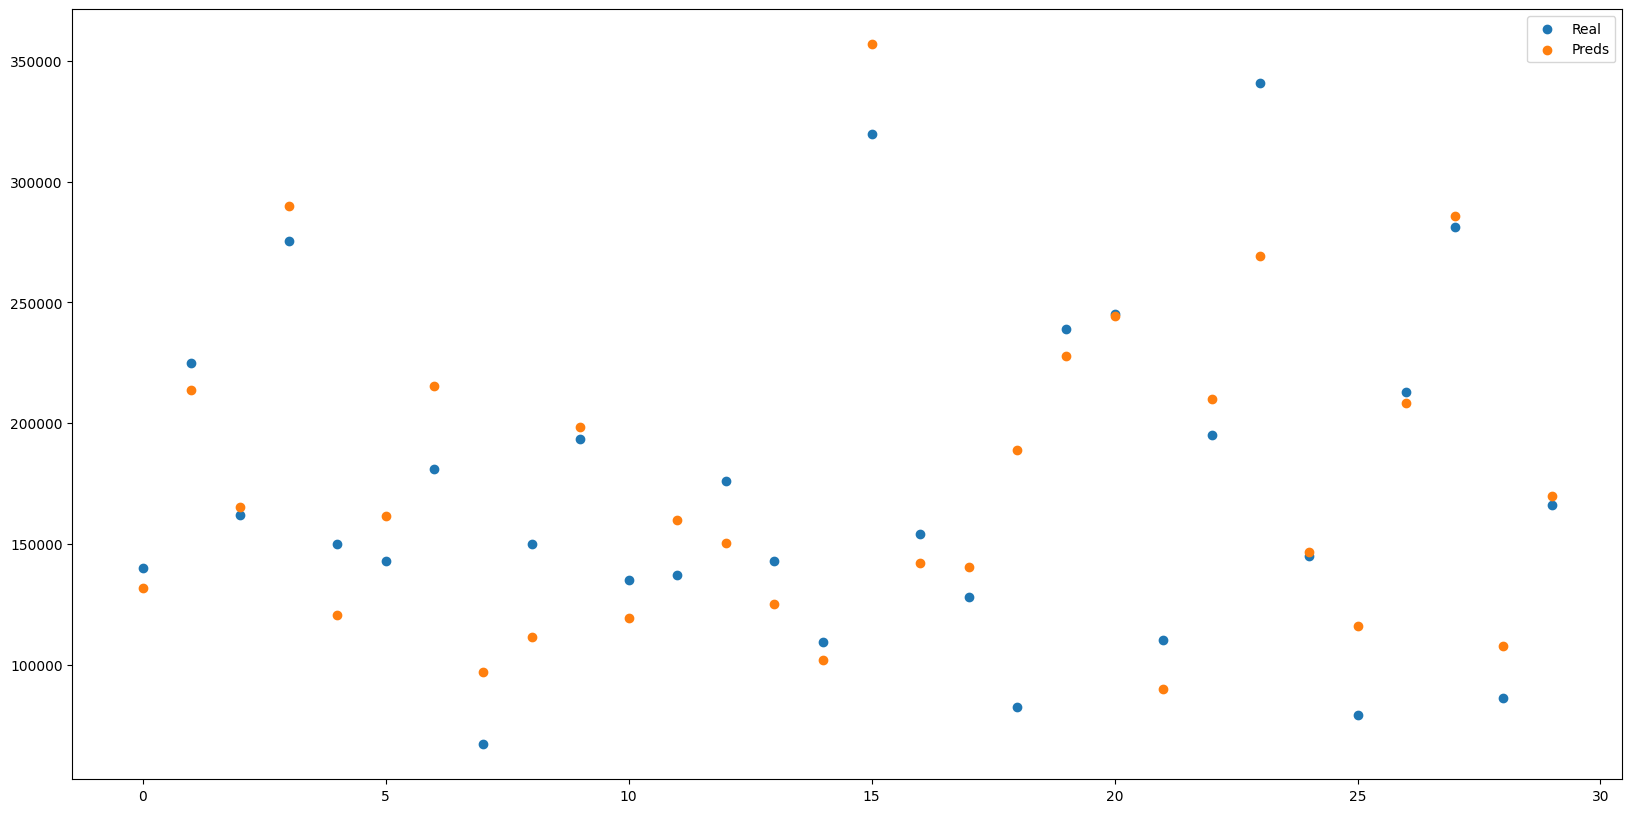

##################################################
Modèle en cours:  rand_for


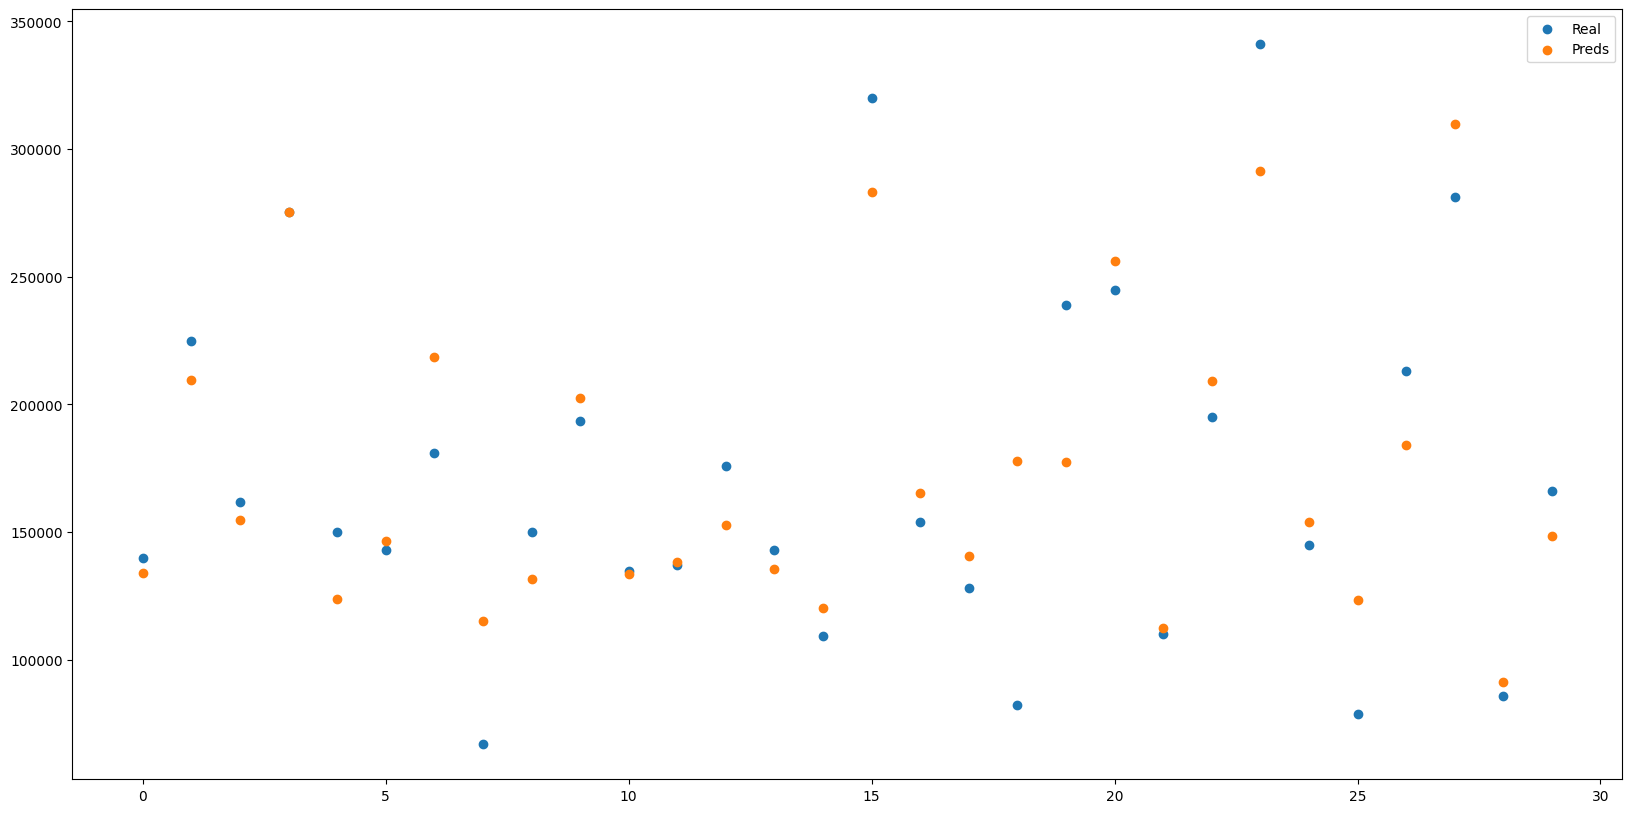

##################################################
Modèle en cours:  SVR


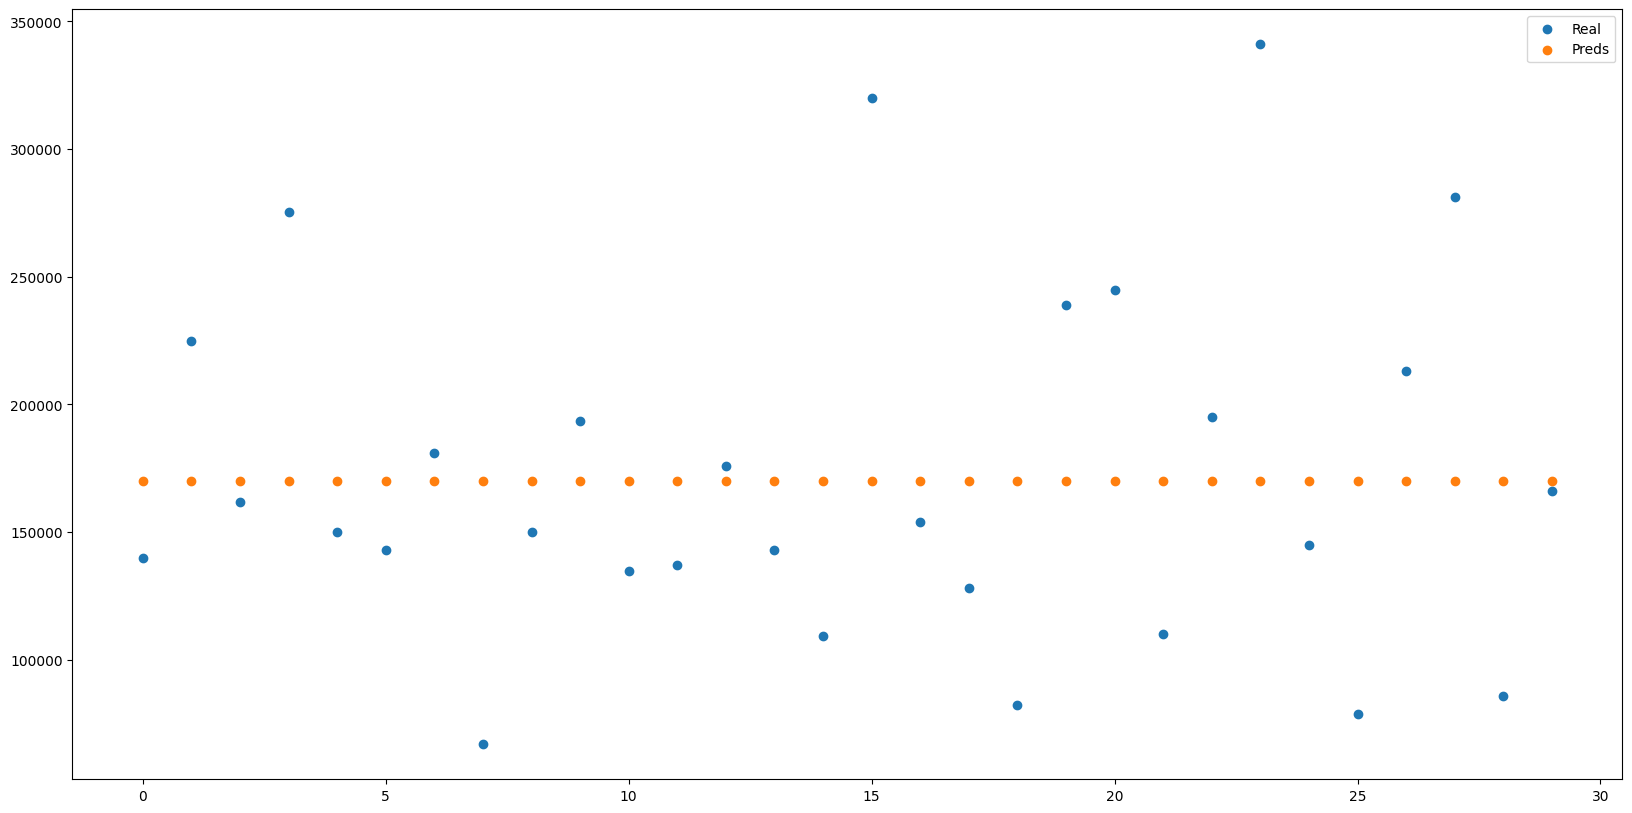

In [171]:
scores_df = pd.DataFrame()
for model_name, model in models.items():
    print("#"*50)
    print("Modèle en cours: ", model_name)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    scores_df = pd.concat([
        scores_df,
        pd.DataFrame([{
            "model": model_name,
            "R2" : r2_score(y_test, predictions),
            "MAE" : mean_absolute_error(y_test, predictions),
            "MSE" : mean_squared_error(y_test, predictions)
        }])
    ], axis=0)
    plt.figure(figsize=(20,10))
    plt.scatter(x=range(30), y=y_test[:30], label='Real')
    plt.scatter(x=range(30), y=predictions[:30], label='Preds')
    plt.legend()
    plt.show()

In [172]:
scores_df.sort_values("R2", ascending=False)

,model,R2,MAE,MSE
0,rand_for,0.781789,19891.045427,1.227506e+09
0,reg_lin,0.756025,22876.433326,1.372436e+09
0,SVR,-0.035666,52800.878622,5.825947e+09


In [173]:
research_space = {
    "n_estimators" : [50, 100, 150, 200],
    "max_depth" : [50, 100, 200]
}

In [174]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [175]:
model = RandomForestRegressor()
grid_model = GridSearchCV(model, research_space, verbose=3)

In [176]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .....max_depth=50, n_estimators=50;, score=0.852 total time=   0.4s
[CV 2/5] END .....max_depth=50, n_estimators=50;, score=0.816 total time=   0.4s
[CV 3/5] END .....max_depth=50, n_estimators=50;, score=0.656 total time=   0.4s
[CV 4/5] END .....max_depth=50, n_estimators=50;, score=0.824 total time=   0.4s
[CV 5/5] END .....max_depth=50, n_estimators=50;, score=0.844 total time=   0.4s
[CV 1/5] END ....max_depth=50, n_estimators=100;, score=0.848 total time=   0.9s
[CV 2/5] END ....max_depth=50, n_estimators=100;, score=0.815 total time=   0.9s
[CV 3/5] END ....max_depth=50, n_estimators=100;, score=0.682 total time=   1.0s
[CV 4/5] END ....max_depth=50, n_estimators=100;, score=0.837 total time=   0.9s
[CV 5/5] END ....max_depth=50, n_estimators=100;, score=0.842 total time=   1.0s
[CV 1/5] END ....max_depth=50, n_estimators=150;, score=0.850 total time=   1.3s
[CV 2/5] END ....max_depth=50, n_estimators=150;

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [50, 100, 200],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=3)

In [177]:
grid_model.best_params_

{'max_depth': 200, 'n_estimators': 50}

In [178]:
grid_model.best_score_

0.8070365599496221

In [179]:
grid_model.best_estimator_

RandomForestRegressor(max_depth=200, n_estimators=50)

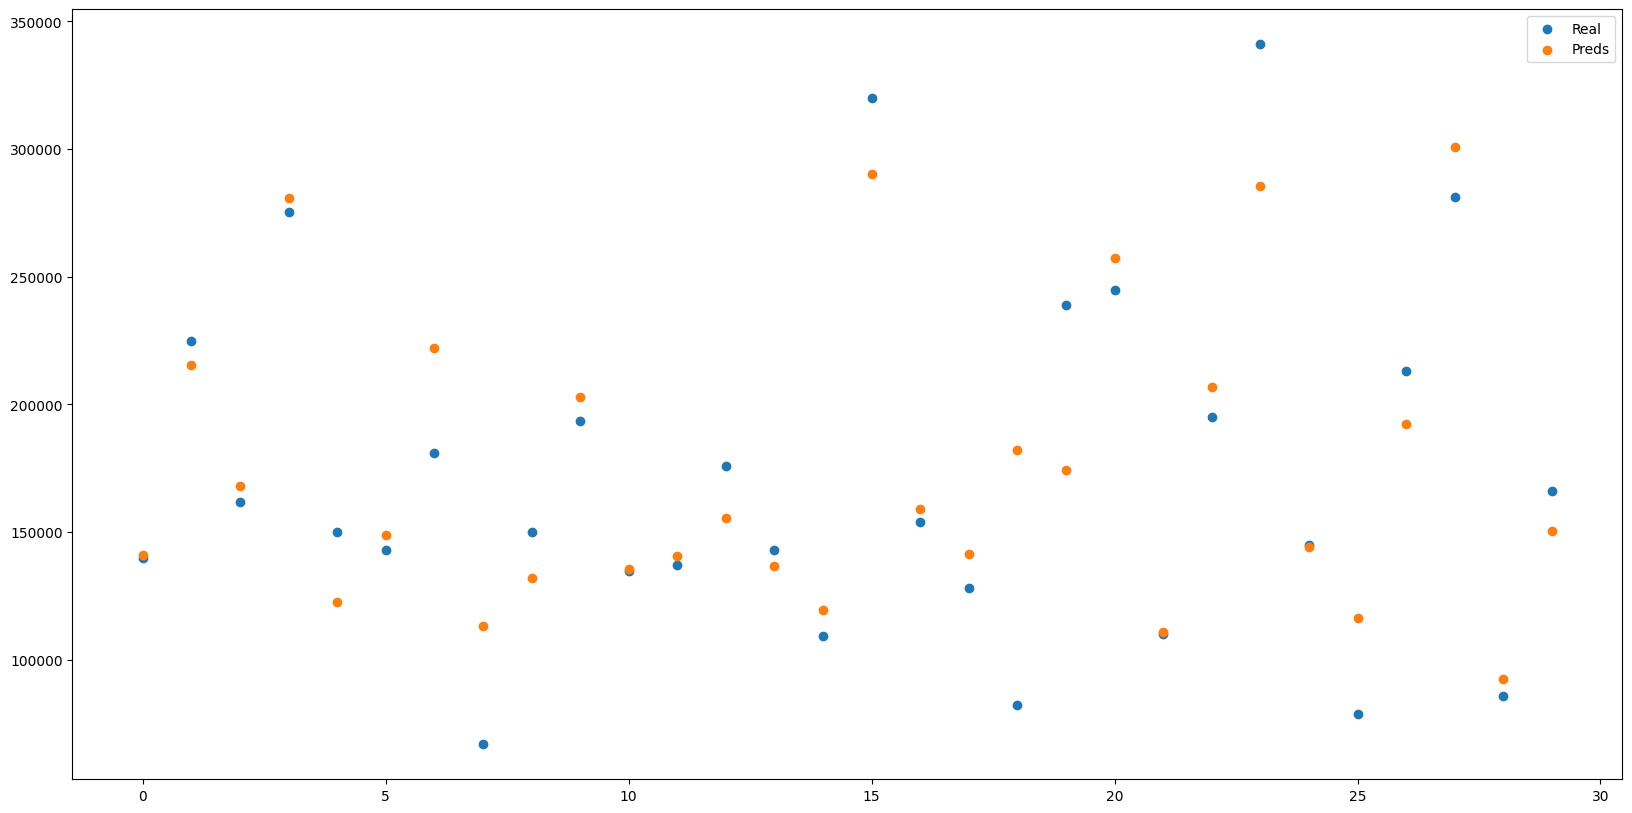

In [180]:
predictions = grid_model.predict(X_test)
scores_df = pd.concat([
    scores_df,
    pd.DataFrame([{
        "model": "Rand forst Grid_search",
        "R2" : r2_score(y_test, predictions),
        "MAE" : mean_absolute_error(y_test, predictions),
        "MSE" : mean_squared_error(y_test, predictions)
    }])
], axis=0)
plt.figure(figsize=(20,10))
plt.scatter(x=range(30), y=y_test[:30], label='Real')
plt.scatter(x=range(30), y=predictions[:30], label='Preds')
plt.legend()
plt.show()

In [181]:
scores_df.sort_values("R2", ascending=False)

,model,R2,MAE,MSE
0,Rand forst Grid_search,0.783055,20408.908192,1.220384e+09
0,rand_for,0.781789,19891.045427,1.227506e+09
0,reg_lin,0.756025,22876.433326,1.372436e+09
0,SVR,-0.035666,52800.878622,5.825947e+09


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...max_depth=100, n_estimators=100;, score=0.843 total time=   0.8s
[CV 2/5] END ...max_depth=100, n_estimators=100;, score=0.809 total time=   0.8s
[CV 3/5] END ...max_depth=100, n_estimators=100;, score=0.677 total time=   0.8s
[CV 4/5] END ...max_depth=100, n_estimators=100;, score=0.831 total time=   0.8s
[CV 5/5] END ...max_depth=100, n_estimators=100;, score=0.841 total time=   0.8s
[CV 1/5] END ....max_depth=50, n_estimators=150;, score=0.852 total time=   1.3s
[CV 2/5] END ....max_depth=50, n_estimators=150;, score=0.816 total time=   1.3s
[CV 3/5] END ....max_depth=50, n_estimators=150;, score=0.680 total time=   1.3s
[CV 4/5] END ....max_depth=50, n_estimators=150;, score=0.836 total time=   1.3s
[CV 5/5] END ....max_depth=50, n_estimators=150;, score=0.842 total time=   1.3s
[CV 1/5] END ....max_depth=50, n_estimators=100;, score=0.847 total time=   0.8s
[CV 2/5] END ....max_depth=50, n_estimators=100;

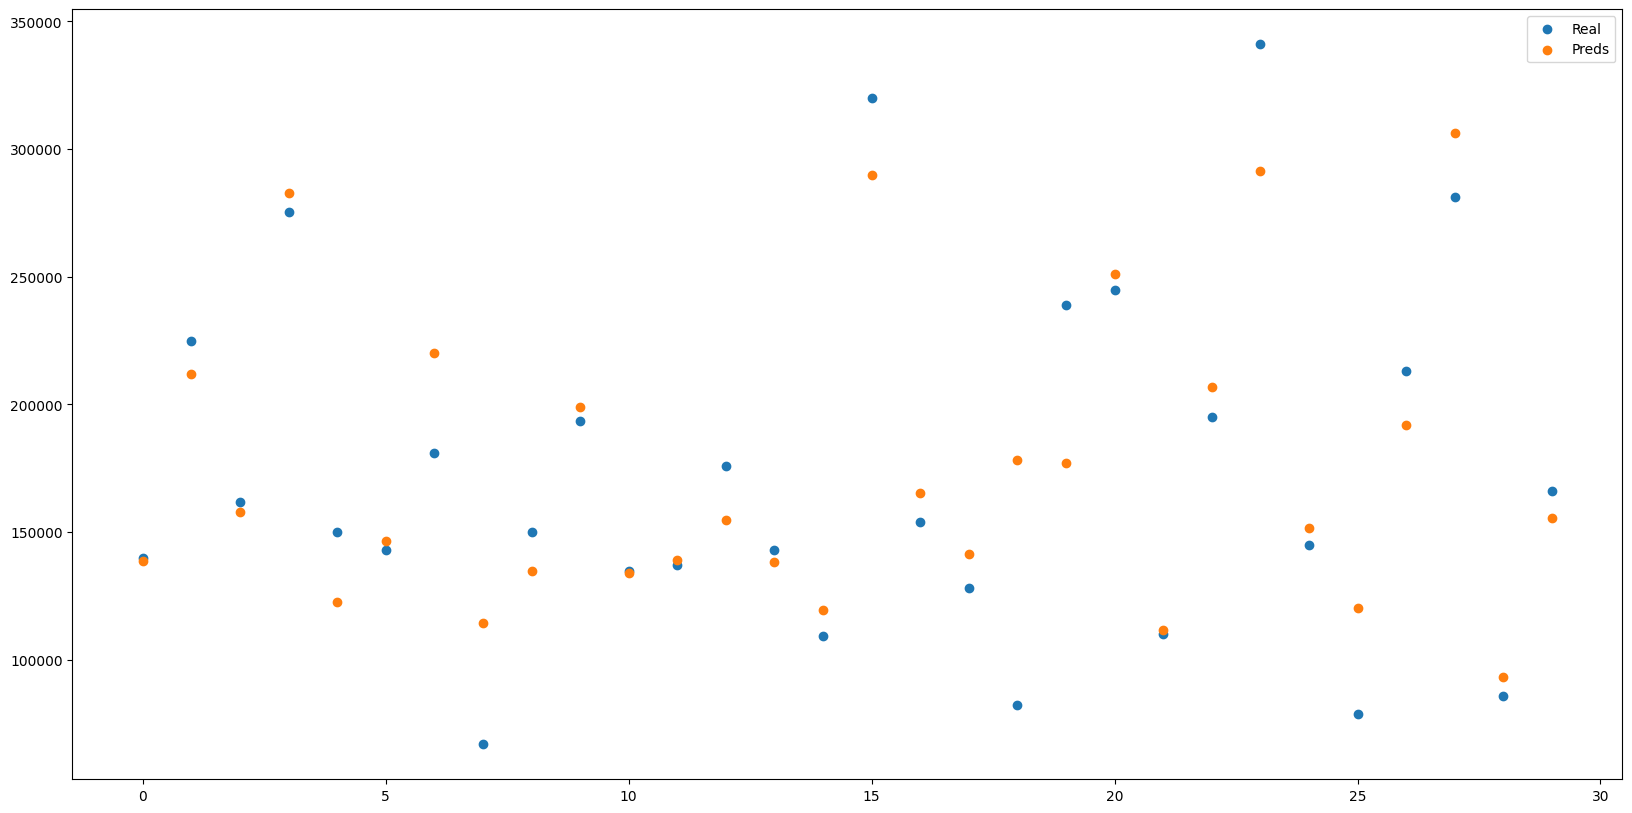

In [182]:
model = RandomForestRegressor()
grid_model = RandomizedSearchCV(model, research_space, verbose=3)
grid_model.fit(X_train, y_train)
predictions = grid_model.predict(X_test)
scores_df = pd.concat([
    scores_df,
    pd.DataFrame([{
        "model": "Rand forst Rand_search",
        "R2" : r2_score(y_test, predictions),
        "MAE" : mean_absolute_error(y_test, predictions),
        "MSE" : mean_squared_error(y_test, predictions)
    }])
], axis=0)
plt.figure(figsize=(20,10))
plt.scatter(x=range(30), y=y_test[:30], label='Real')
plt.scatter(x=range(30), y=predictions[:30], label='Preds')
plt.legend()
plt.show()

In [183]:
scores_df.sort_values("R2", ascending=False)

,model,R2,MAE,MSE
0,Rand forst Grid_search,0.783055,20408.908192,1.220384e+09
0,rand_for,0.781789,19891.045427,1.227506e+09
0,Rand forst Rand_search,0.779036,19871.215796,1.242993e+09
0,reg_lin,0.756025,22876.433326,1.372436e+09
0,SVR,-0.035666,52800.878622,5.825947e+09


In [184]:
import keras
from keras import layers

In [185]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
    ]
)

In [186]:
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
import tensorflow as tf

# Fonction pour calculer R2
def r2_score(y_true, y_pred):
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon())

In [187]:
model.compile(optimizer="adam", loss="mse", metrics=[r2_score, "mae"])

In [188]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
30/30 [==============================] - 1s 1ms/step - loss: 41035030528.0000 - r2_score: -6.6834 - mae: 185949.3125
Epoch 2/200
30/30 [==============================] - 0s 1ms/step - loss: 38646222848.0000 - r2_score: -6.1243 - mae: 179748.1719
Epoch 3/200
30/30 [==============================] - 0s 1ms/step - loss: 32710692864.0000 - r2_score: -5.0796 - mae: 163018.3750
Epoch 4/200
30/30 [==============================] - 0s 941us/step - loss: 21698760704.0000 - r2_score: -2.7834 - mae: 126569.9141
Epoch 5/200
30/30 [==============================] - 0s 987us/step - loss: 9372240896.0000 - r2_score: -0.5564 - mae: 71169.2891
Epoch 6/200
30/30 [==============================] - 0s 958us/step - loss: 3995259648.0000 - r2_score: 0.3740 - mae: 41798.2656
Epoch 7/200
30/30 [==============================] - 0s 943us/step - loss: 3595593984.0000 - r2_score: 0.4039 - mae: 43137.1523
Epoch 8/200
30/30 [==============================] - 0s 1ms/step - loss: 3548445184.0000 - r2_sco

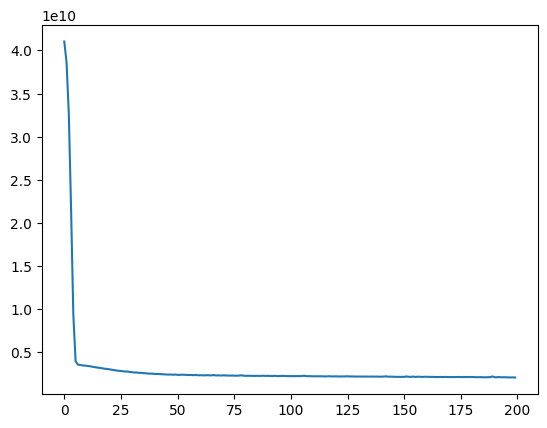

KeyError: <function r2_score at 0x000001DE63F39F70>

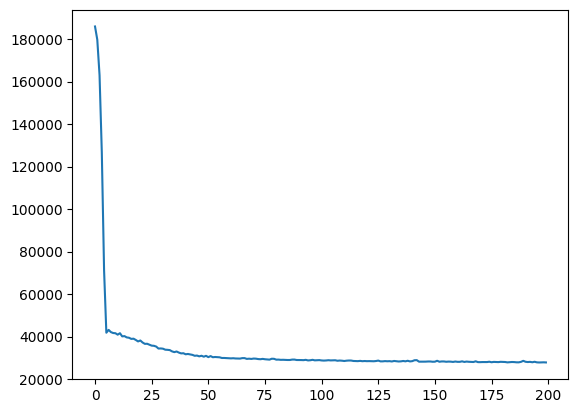

In [189]:
plt.figure()
plt.plot(history.history["loss"])
plt.show()

plt.figure()
plt.plot(history.history["mae"], label="MAE")
plt.plot(history.history[r2_score], label="R2")
plt.legend()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


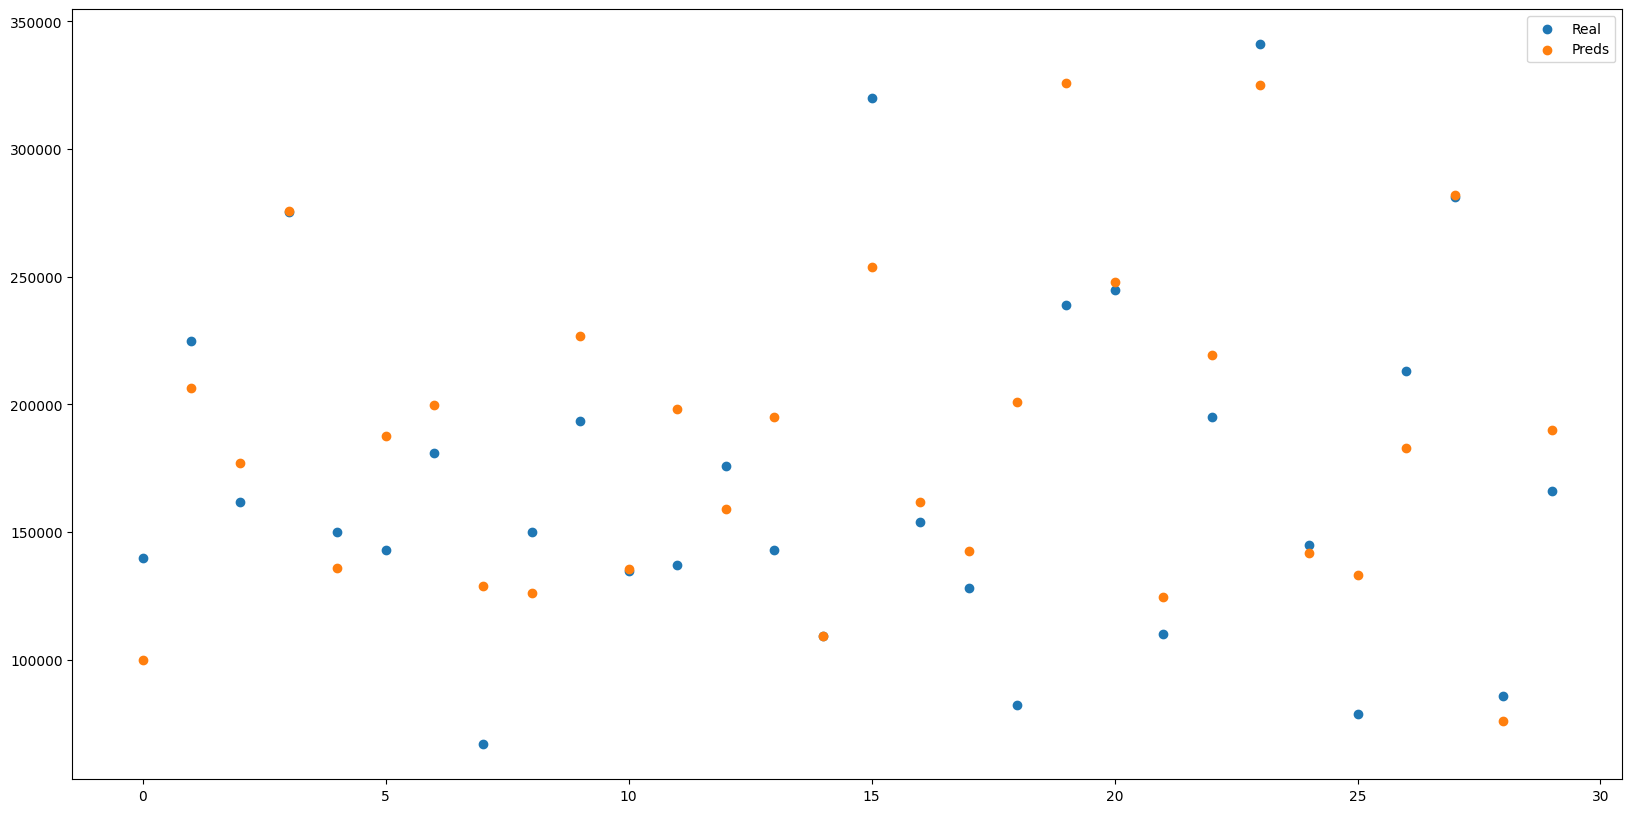

In [134]:
predictions = model.predict(X_test)
scores_df = pd.concat([
    scores_df,
    pd.DataFrame([{
        "model": "DNN_sans_act",
        "R2" : r2_score(y_test, predictions),
        "MAE" : mean_absolute_error(y_test, predictions),
        "MSE" : mean_squared_error(y_test, predictions)
    }])
], axis=0)
plt.figure(figsize=(20,10))
plt.scatter(x=range(30), y=y_test[:30], label='Real')
plt.scatter(x=range(30), y=predictions[:30], label='Preds')
plt.legend()
plt.show()

In [135]:
scores_df.sort_values("R2", ascending=False)

,model,R2,MAE,MSE
0,rand_for,0.780696,19982.450200,1.233655e+09
0,Rand forst Rand_search,0.779371,19944.591621,1.241107e+09
0,Rand forst Grid_search,0.777317,20001.566727,1.252661e+09
0,reg_lin,0.756025,22876.433326,1.372436e+09
0,DNN_sans_act,0.646382,28973.128752,1.989213e+09
0,DNN,0.640486,29081.337712,2.022378e+09
0,SVR,-0.035666,52800.878622,5.825947e+09


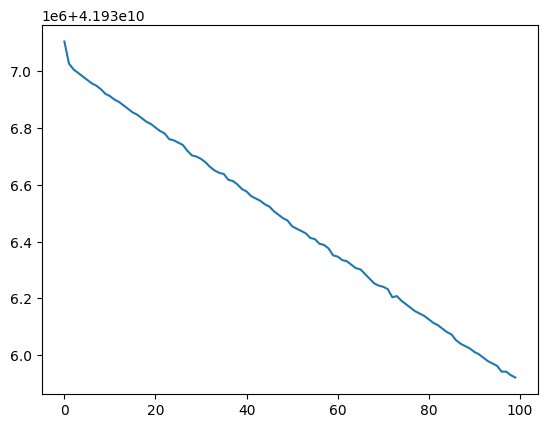

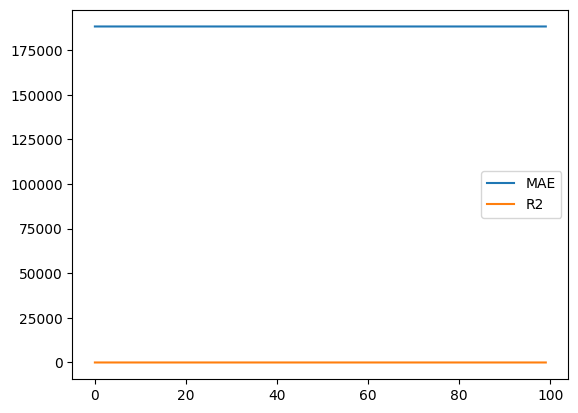

13/13 [==============================] - 0s 1ms/step


AttributeError: 'numpy.dtypes.Int64DType' object has no attribute 'base_dtype'

In [190]:
for n_neurons in range(1, 9):
    model = keras.Sequential()
    model.add(layers.Dense(2**(n_neurons), activation="relu", input_shape=(X_train.shape[1],)) )
    for n_layers in range(1, 6):
        for i in range(n_layers):
            model.add(layers.Dense(2**(n_neurons), activation="relu"))
        model.add(layers.Dense(1))
        model.compile(optimizer="adam", loss="mse", metrics=[r2_score, "mae"])
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
        
        plt.figure()
        plt.plot(history.history["loss"])
        plt.show()

        plt.figure()
        plt.plot(history.history["mae"], label="MAE")
        plt.plot(history.history["r2_score"], label="R2")
        plt.legend()
        plt.show()
        
        predictions = model.predict(X_test)
        scores_df = pd.concat([
            scores_df,
            pd.DataFrame([{
                "model": "DNN_n_layers_{}_n_neur_{}".format(n_layers, n_neurons),
                "R2" : r2_score(y_test, predictions),
                "MAE" : mean_absolute_error(y_test, predictions),
                "MSE" : mean_squared_error(y_test, predictions)
            }])
        ], axis=0)
        plt.figure(figsize=(20,10))
        plt.scatter(x=range(30), y=y_test[:30], label='Real')
        plt.scatter(x=range(30), y=predictions[:30], label='Preds')
        plt.legend()
        plt.show()
    

In [137]:
scores_df.sort_values("R2", ascending=False)

,model,R2,MAE,MSE
0,rand_for,0.780696,19982.450200,1.233655e+09
0,Rand forst Rand_search,0.779371,19944.591621,1.241107e+09
0,Rand forst Grid_search,0.777317,20001.566727,1.252661e+09
0,reg_lin,0.756025,22876.433326,1.372436e+09
0,DNN_n_layers_5_n_neur_7,0.676671,24733.437539,1.818825e+09
0,DNN_n_layers_4_n_neur_8,0.671414,23381.420332,1.848399e+09
0,DNN_n_layers_5_n_neur_5,0.669869,28346.716271,1.857090e+09
0,DNN_n_layers_5_n_neur_6,0.665105,25867.940876,1.883887e+09
0,DNN_n_layers_4_n_neur_6,0.663186,28241.368326,1.894684e+09
0,DNN_n_layers_3_n_neur_7,0.663140,30006.805710,1.894943e+09


In [112]:
X_train

array([[   6, 1992, 1992, ...,    0,    1,    0],
       [   6, 1988, 2007, ...,    1,    0,    0],
       [   7, 2000, 2001, ...,    0,    0,    1],
       ...,
       [   7, 2006, 2006, ...,    0,    1,    0],
       [   8, 2007, 2007, ...,    1,    0,    0],
       [   7, 2004, 2005, ...,    1,    0,    0]], dtype=int64)

In [192]:
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))



In [199]:


model = keras.Sequential()

model.add(keras.layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(keras.layers.Conv1D(32, 3, activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))


In [200]:
model.compile(optimizer="adam", loss="mse", metrics=[r2_score, "mae"])

In [202]:
history = model.fit(X_train_reshaped, y_train, epochs=200, batch_size=32)


Epoch 1/200
30/30 [==============================] - 0s 2ms/step - loss: 2055430272.0000 - r2_score: 0.6502 - mae: 28207.1289
Epoch 2/200
30/30 [==============================] - 0s 2ms/step - loss: 2013951744.0000 - r2_score: 0.6675 - mae: 28195.4980
Epoch 3/200
30/30 [==============================] - 0s 2ms/step - loss: 2026535552.0000 - r2_score: 0.6472 - mae: 28237.0801
Epoch 4/200
30/30 [==============================] - 0s 2ms/step - loss: 2010979200.0000 - r2_score: 0.5881 - mae: 28313.1074
Epoch 5/200
30/30 [==============================] - 0s 2ms/step - loss: 2043228928.0000 - r2_score: 0.6504 - mae: 28104.7715
Epoch 6/200
30/30 [==============================] - 0s 2ms/step - loss: 2044110848.0000 - r2_score: 0.6849 - mae: 28727.6562
Epoch 7/200
30/30 [==============================] - 0s 2ms/step - loss: 2004969984.0000 - r2_score: 0.6799 - mae: 28193.9473
Epoch 8/200
30/30 [==============================] - 0s 2ms/step - loss: 1990421632.0000 - r2_score: 0.6681 - mae: 279

In [196]:
predictions = model.predict(X_test_reshaped)


13/13 [==============================] - 0s 1ms/step


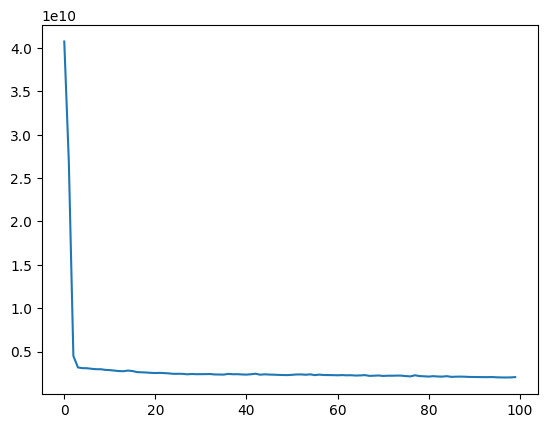

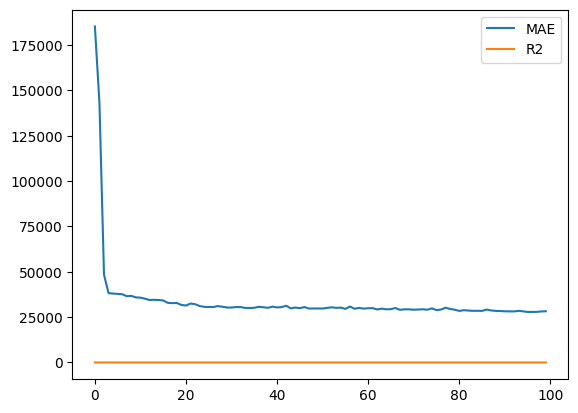

AttributeError: 'numpy.dtypes.Int64DType' object has no attribute 'base_dtype'

In [198]:
plt.figure()
plt.plot(history.history["loss"])
plt.show()

plt.figure()
plt.plot(history.history["mae"], label="MAE")
plt.plot(history.history["r2_score"], label="R2")
plt.legend()
plt.show()

scores_df = pd.concat([
    scores_df,
    pd.DataFrame([{
        "model": "CNN_1D",
        "R2" : r2_score(y_test, predictions),
        "MAE" : mean_absolute_error(y_test, predictions),
        "MSE" : mean_squared_error(y_test, predictions)
    }])
], axis=0)
plt.figure(figsize=(20,10))
plt.scatter(x=range(30), y=y_test[:30], label='Real')
plt.scatter(x=range(30), y=predictions[:30], label='Preds')
plt.legend()
plt.show()

In [218]:


model = keras.Sequential()

model.add(keras.layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1],1), padding="same", strides=2))
model.add(keras.layers.MaxPooling1D(2))
model.add(keras.layers.Conv1D(32, 3, activation='relu'))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))


In [219]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [220]:
history = model.fit(X_train_reshaped, y_train, epochs=200, batch_size=32)


Epoch 1/200
30/30 [==============================] - 1s 2ms/step - loss: 41276248064.0000 - mae: 186571.0625
Epoch 2/200
30/30 [==============================] - 0s 2ms/step - loss: 36845998080.0000 - mae: 174952.3906
Epoch 3/200
30/30 [==============================] - 0s 2ms/step - loss: 19834068992.0000 - mae: 118185.1797
Epoch 4/200
30/30 [==============================] - 0s 2ms/step - loss: 3653318656.0000 - mae: 41088.4570
Epoch 5/200
30/30 [==============================] - 0s 2ms/step - loss: 3022387456.0000 - mae: 36520.8008
Epoch 6/200
30/30 [==============================] - 0s 2ms/step - loss: 2947791104.0000 - mae: 37021.3320
Epoch 7/200
30/30 [==============================] - 0s 2ms/step - loss: 2944013568.0000 - mae: 36428.4844
Epoch 8/200
30/30 [==============================] - 0s 2ms/step - loss: 2903090944.0000 - mae: 36138.7695
Epoch 9/200
30/30 [==============================] - 0s 2ms/step - loss: 2896197888.0000 - mae: 36719.6523
Epoch 10/200
30/30 [===========

13/13 [==============================] - 0s 1ms/step


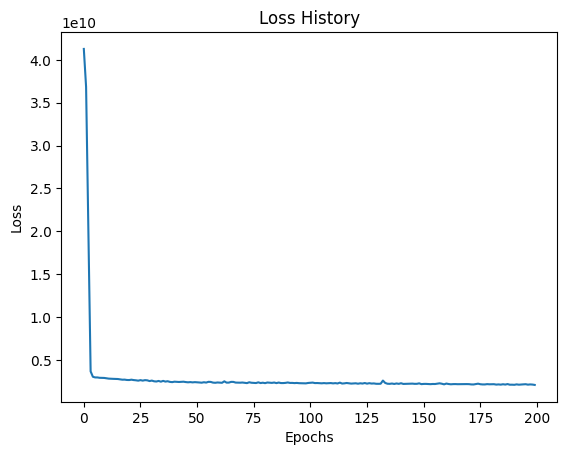

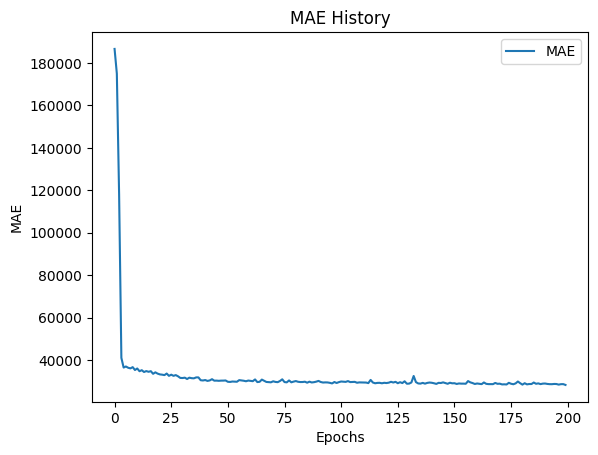

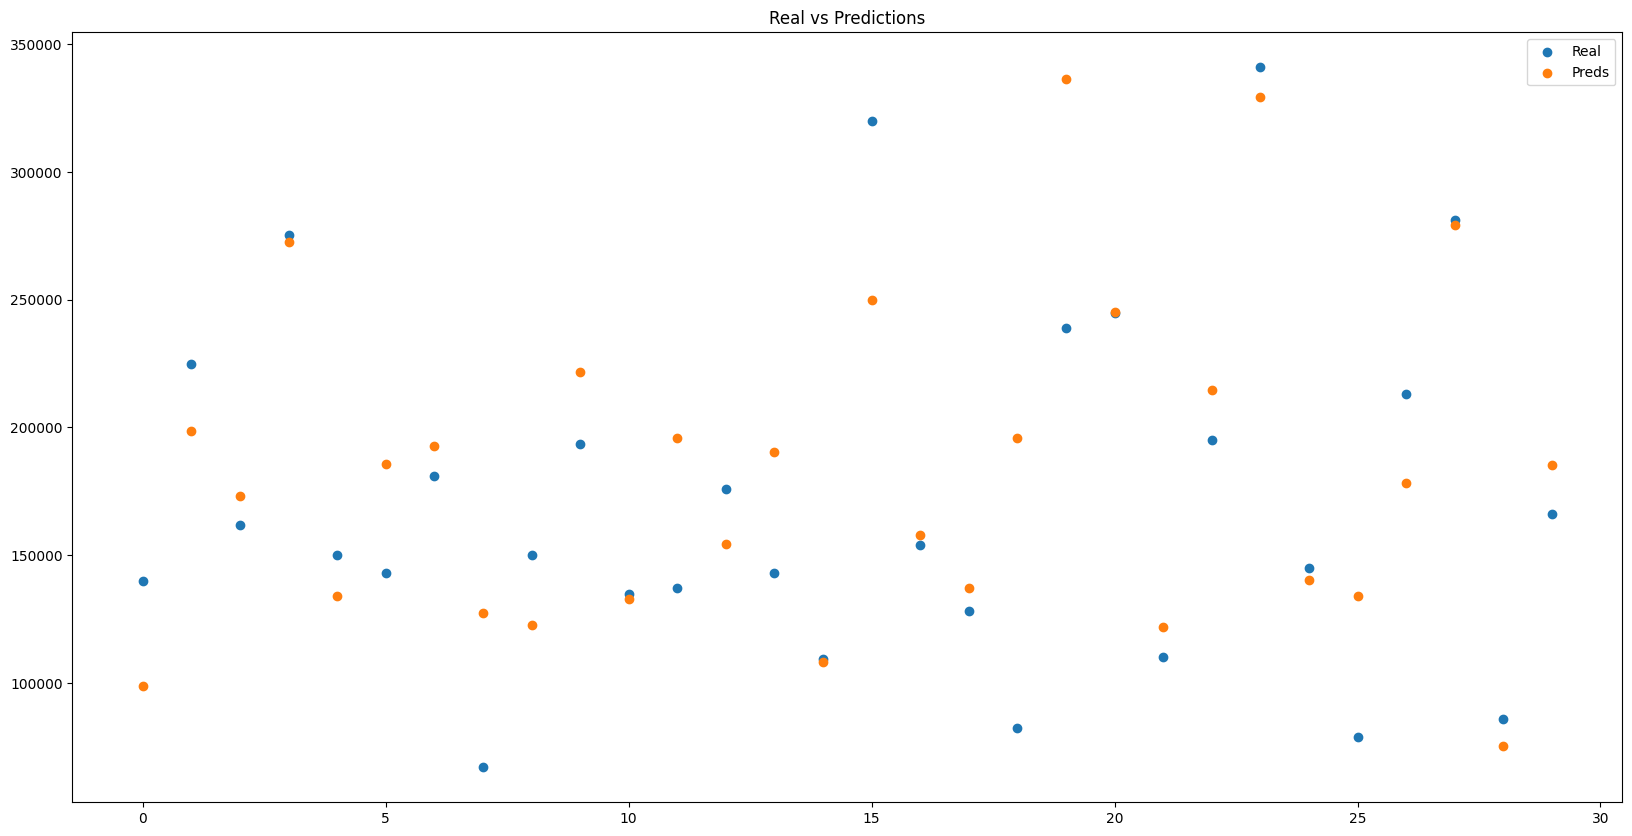

In [221]:
predictions = model.predict(X_test_reshaped)

plt.figure()
plt.plot(history.history["loss"])
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(history.history["mae"], label="MAE")
plt.title("MAE History")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

scores_df = pd.concat([
    scores_df,
    pd.DataFrame([{
        "model": "CNN_1D",
        "MAE": mae,
        "MSE": mse
    }])
], axis=0)

plt.figure(figsize=(20, 10))
plt.scatter(x=range(30), y=y_test[:30], label='Real')
plt.scatter(x=range(30), y=predictions[:30], label='Preds')
plt.legend()
plt.title("Real vs Predictions")
plt.show()